In [1]:
%matplotlib inline

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import random

# Chapter 3

## Easy

These problems use the samples from the posterior distribution for the globe tossing example. This code will give you a specific set of samples, so that you can check your answers exactly.

<Container object of 100 artists>

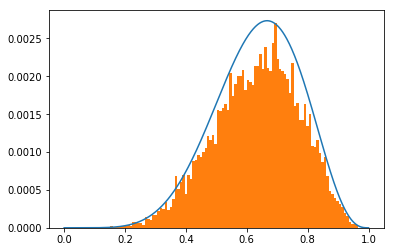

In [2]:
GRID_SIZE = 1000
BINS = 100

p_grid = np.linspace(start=0, stop=1, num=GRID_SIZE)
prior = np.ones(1000)
likelihood = scipy.stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)
random.seed(100)

def sample_observations_with_replacement(values, distribution, n):
    cumulative = np.cumsum(distribution)
    return np.array([values[np.where(cumulative >= random.random())[0][0]] for i in range(n)])
    
samples = sample_observations_with_replacement(p_grid, posterior, 10000)
fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
results, edges = np.histogram(samples, bins=BINS, normed=True)
binWidth = edges[1] - edges[0]
ax.bar(edges[:-1], results*binWidth/(GRID_SIZE/float(BINS)), binWidth, color='#ff7f0e')

Use the values in *samples* to answer the questions that follow.

**3E1** How much posterior probability lies below p = 0.2?

In [3]:
np.sum(samples < 0.2)/float(len(samples))

0.001

**3E2** How much posterior probability lies above p = 0.8?

In [4]:
np.sum(samples > 0.8)/float(len(samples))

0.1234

**3E3** How much posterior probability lies between p = 0.2 and p = 0.8?

In [5]:
np.sum(np.logical_and(samples > 0.2, samples < 0.8))/float(len(samples))

0.87560000000000004

**3E4** 20% of the posterior probability lies below which value of p?

In [6]:
np.percentile(samples, 20)

0.51651651651651653

**3E5** 20% of the posterior probability lies above which value of p?

In [7]:
np.percentile(samples, 80)

0.75975975975975973

**3E6** Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [8]:
def highest_posterior_density_interval(samples, prob):
    grid = np.linspace(start=0, stop=100 - prob, num=10000)
    per_i = []
    per_j = []
    width = []
    for i in grid:
        per_i.append(np.percentile(samples, i))
        if i + prob <= 100:
            per_j.append(np.percentile(samples, i + prob))
            width.append(per_j[-1] - per_i[-1])
    i = np.argmin(width)
    print('[' + str(per_i[i]) + ', ' + str(per_j[i]) + '] - width = ' + str(width[i]))
    
highest_posterior_density_interval(samples, 66)

[0.506506506507, 0.77977977978] - width = 0.273273273273


**3E7** Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [9]:
prob = (100 - 66)/2.0
print('[' + str(np.percentile(samples, prob)) + ', ' + str(np.percentile(samples, 100-prob)) + ']')

[0.499499499499, 0.774774774775]


## Medium

**3M1** Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

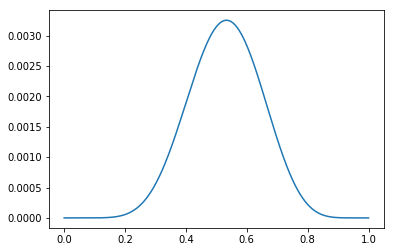

In [10]:
likelihood = scipy.stats.binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)

**3M2** Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [11]:
samples = sample_observations_with_replacement(p_grid, posterior, 10000)
highest_posterior_density_interval(samples, 90)

[0.331331331331, 0.716716716717] - width = 0.385385385385


**3M3** Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

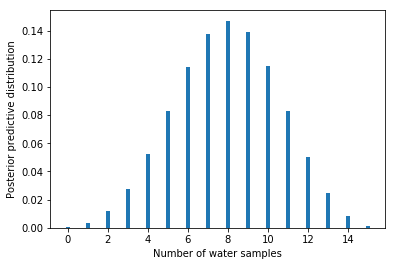

In [12]:
N = 15
post_pred = np.zeros(N + 1)
i = 0
for p in p_grid:
    sample = np.random.binomial(N, p=p, size=100000)
    dist, edges = np.histogram(sample, bins=np.linspace(start=0, stop=N, num=N+2))
    post_pred += posterior[i] * dist / np.sum(dist) 
    i = i + 1
fig, ax = plt.subplots()
ax.bar(range(N + 1), post_pred, width=0.2)
ax.set_xlabel('Number of water samples')
ax.set_ylabel('Posterior predictive distribution')

**3M4** Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [13]:
# Using the samples list which contains the p values samples from the posterior
sample = np.random.binomial(N, p=samples)
print(np.sum(sample==6)/float(len(sample)))

0.1152


**3M5** Start over at **3M1**, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5.  is corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p = 0.7.

HPDI
[0.500500500501, 0.711711711712] - width = 0.211211211211


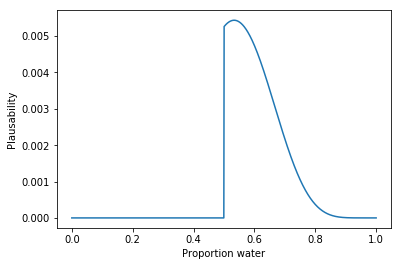

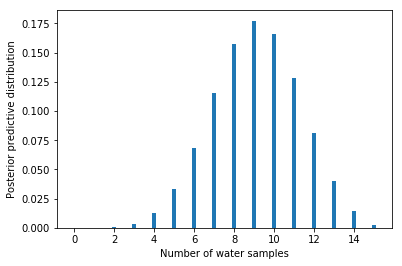

In [14]:
prior = np.ones(p_grid.shape[0])
prior[0:int(prior.shape[0]/2)] = 0

posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
ax.set_xlabel('Proportion water')
ax.set_ylabel('Plausability')

print('HPDI')
samples = sample_observations_with_replacement(p_grid, posterior, 10000)
highest_posterior_density_interval(samples, 90)

N = 15
post_pred = np.zeros(N + 1)
i = 0
for p in p_grid:
    sample = np.random.binomial(N, p=p, size=100000)
    dist, edges = np.histogram(sample, bins=np.linspace(start=0, stop=N, num=N+2))
    post_pred += posterior[i] * dist / np.sum(dist) 
    i = i + 1
fig, ax = plt.subplots()
ax.bar(range(N + 1), post_pred, width=0.2)
ax.set_xlabel('Number of water samples')
ax.set_ylabel('Posterior predictive distribution')

The MAP for p is closer to 0.7 now, the real p value. The HPDI is narrower around that value. The maximum of the posterior predictive distribution is 9 instead of 8 and it is narrower. Once again, that makes p closer to 0.7, the real proportion of water. 